<a href="https://colab.research.google.com/github/mdzakyjaya/MLAZK/blob/main/MLAZK_P3_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simple Linear Regression

In [ ]:
# load data
import pandas as pd

link = "https://raw.githubusercontent.com/mdzakyjaya/MLAZK/main/Data/P3/Salary_Data.csv"
df = pd.read_csv(link)

# define features and label
x = df.iloc[:, :1].values
y = df.iloc[:, 1:].values

# split to train and test
from sklearn.model_selection import train_test_split as tt

x_train, x_test, y_train, y_test = tt(x, y, test_size=0.3, random_state=123)

# create slr model
from sklearn.linear_model import LinearRegression as lr

model = lr()

# train the model
model.fit(x_train, y_train)

# test the model
model.predict(x_test)

print(model.score(x_test, y_test))
print(model.score(x_train, y_train))
print(model.score(x, y))

0.963407053878536
0.9518686093824901
0.9566181589200135


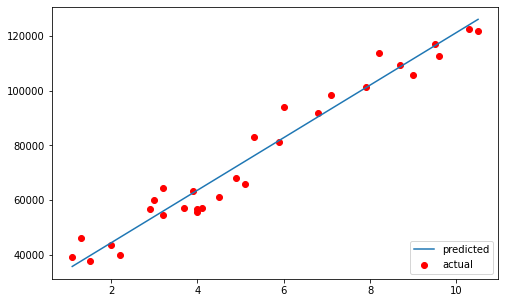

In [ ]:
# visualize the model
from matplotlib import pyplot as plt

plt.figure(figsize=(8,5))
plt.scatter(x, y, label="actual", c="red")
plt.plot(x, model.predict(x), label="predicted")
plt.legend(loc="lower right")
plt.show()

In [ ]:
# how to predict a single experience?
import numpy as np

def angka(i):
    return np.array(i).reshape(1, -1)

model.predict(angka(12))

# or simply
model.predict([[12]])

# how to write down the model?
print("model\nsallary = {} + {}(experience)"
      .format(round(model.intercept_[0], 2),
              round(model.coef_.flatten()[0], 2)))

model
sallary = 25235.62 + 9602.56(experience)


# Multiple Linear Regression

assumption of MLR
1. Linearity
2. Homoscedastisity
3. Multivariate normal distributed
4. independence of errors
5. lack of multicolinearity

In [7]:
# load the data
import pandas as pd

url = "https://raw.githubusercontent.com/mdzakyjaya/MLAZK/main/Data/P3/50_Startups.csv"
df = pd.read_csv(url)

df

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96
